# Credit Card Fraud Detection Project

## Student: John Doe
## Date: December 2024

This notebook contains my machine learning project for detecting fraudulent credit card transactions.

## 1. Import Libraries

In [1]:
# importing necessary libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for preprocessing
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# for model training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# for evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

# for saving model
import pickle

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

## 2. Load and Explore Dataset

In [2]:
# Load the dataset
# Note: Download creditcard.csv from Kaggle and place in data folder
df = pd.read_csv('data/creditcard.csv')

# Check first few rows
print("First 5 rows of dataset:")
df.head()

First 5 rows of dataset:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Basic info about dataset
print("Dataset shape:", df.shape)
print("\nDataset info:")
df.info()

Dataset shape: (284807, 31)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20  

In [4]:
# Check for missing values
print("Missing values in dataset:")
print(df.isnull().sum())

Missing values in dataset:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


Class distribution:
Class
0    284315
1       492
Name: count, dtype: int64

Percentage of fraud transactions: 0.1727485630620034 %


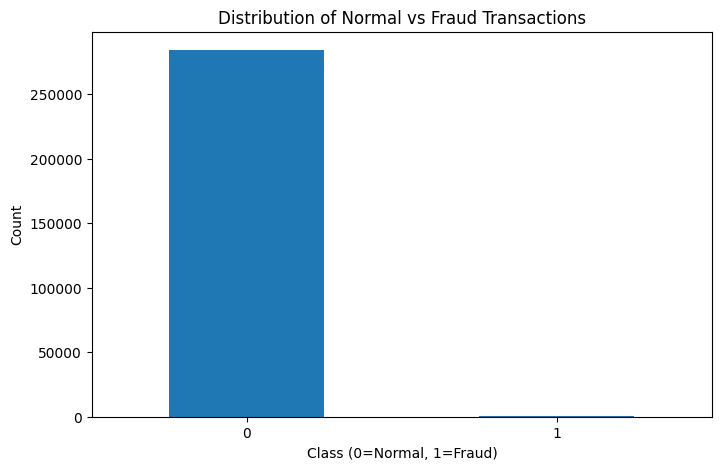

In [5]:
# Check class distribution
print("Class distribution:")
print(df['Class'].value_counts())
print("\nPercentage of fraud transactions:", df['Class'].value_counts()[1] / len(df) * 100, "%")

# visualize class distribution
plt.figure(figsize=(8, 5))
df['Class'].value_counts().plot(kind='bar')
plt.title('Distribution of Normal vs Fraud Transactions')
plt.xlabel('Class (0=Normal, 1=Fraud)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [6]:
# Statistical summary
print("Statistical summary of Amount column:")
df['Amount'].describe()

Statistical summary of Amount column:


count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

## 3. Data Preprocessing

In [7]:
# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (284807, 30)
Target shape: (284807,)


In [8]:
# Scale the Amount and Time columns
# V1-V28 are already scaled from PCA
scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X['Amount'].values.reshape(-1, 1))
X['Time'] = scaler.fit_transform(X['Time'].values.reshape(-1, 1))

print("Scaling completed for Amount and Time columns")

Scaling completed for Amount and Time columns


In [9]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)
print("\nClass distribution in training set:")
print(y_train.value_counts())

Training set size: (199364, 30)
Test set size: (85443, 30)

Class distribution in training set:
Class
0    199020
1       344
Name: count, dtype: int64


## 4. Handle Class Imbalance

Since the dataset is highly imbalanced, I'll use SMOTE to oversample the minority class

In [10]:
# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("Original training set shape:", X_train.shape)
print("Balanced training set shape:", X_train_balanced.shape)
print("\nClass distribution after SMOTE:")
print(pd.Series(y_train_balanced).value_counts())

Original training set shape: (199364, 30)
Balanced training set shape: (398040, 30)

Class distribution after SMOTE:
Class
0    199020
1    199020
Name: count, dtype: int64


## 5. Model Training

I will train 3 different models and compare there performance

In [25]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=10),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
}

# Dictionary to store results
results = {}

In [26]:
# Train and evaluate each model
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    
    # Train model
    model.fit(X_train_balanced, y_train_balanced)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store results
    results[model_name] = {
        'model': model,
        'predictions': y_pred,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")


Training Logistic Regression...
Accuracy: 0.9773
Precision: 0.0633
Recall: 0.8784
F1-Score: 0.1181

Training Decision Tree...
Accuracy: 0.9856
Precision: 0.0888
Recall: 0.7905
F1-Score: 0.1596

Training Random Forest...
Accuracy: 0.9983
Precision: 0.5000
Recall: 0.8176
F1-Score: 0.6205


## 6. Model Evaluation and Comparison

In [29]:
comparison_df = pd.DataFrame({
    'Model': results.keys(),
    'Accuracy': [results[m]['accuracy'] for m in results.keys()],
    'Precision': [results[m]['precision'] for m in results.keys()],
    'Recall': [results[m]['recall'] for m in results.keys()],
    'F1-Score': [results[m]['f1_score'] for m in results.keys()]
})

print("\nModel Performance Comparison:")
print(comparison_df.to_string(index=False))



Model Performance Comparison:
              Model  Accuracy  Precision   Recall  F1-Score
Logistic Regression  0.977283   0.063322 0.878378  0.118128
      Decision Tree  0.985581   0.088771 0.790541  0.159618
      Random Forest  0.998268   0.500000 0.817568  0.620513


Shape: (3, 5)
Columns: ['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score']
                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.977283   0.063322  0.878378  0.118128
1        Decision Tree  0.985581   0.088771  0.790541  0.159618
2        Random Forest  0.998268   0.500000  0.817568  0.620513


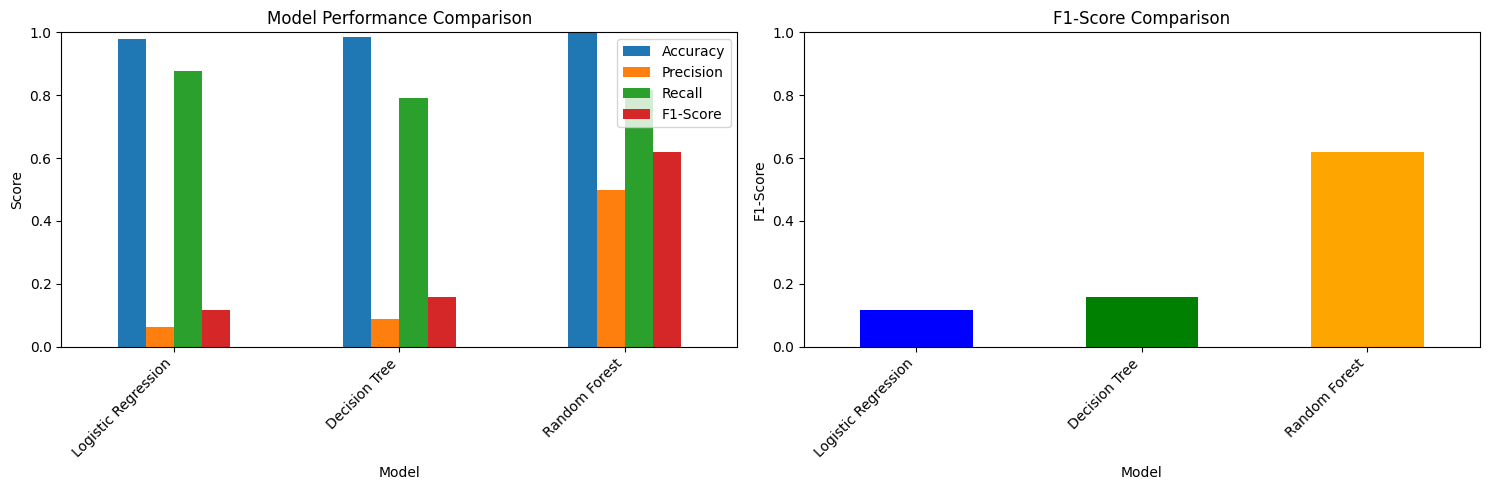

In [30]:
# Visualize model comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

print("Shape:", comparison_df.shape)
print("Columns:", comparison_df.columns.tolist())
print(comparison_df)

# 1️⃣ Bar plot for all metrics
comparison_df.set_index('Model').plot(kind='bar', ax=axes[0])
axes[0].set_title('Model Performance Comparison')
axes[0].set_ylabel('Score')
axes[0].set_xlabel('Model')
axes[0].legend(loc='best')
axes[0].set_ylim([0, 1])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

# 2️⃣ Focus on F1-Score
comparison_df.set_index('Model')['F1-Score'].plot(
    kind='bar', 
    ax=axes[1], 
    color=['blue', 'green', 'orange']
)
axes[1].set_title('F1-Score Comparison')
axes[1].set_ylabel('F1-Score')
axes[1].set_xlabel('Model')
axes[1].set_ylim([0, 1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.savefig('figures/model_comparison.png')
plt.show()


## 7. Detailed Analysis of Best Model

Based on the F1-score, let's analyze the best performing model in detail

In [13]:
# Find best model based on F1-score
best_model_name = comparison_df.loc[comparison_df['F1-Score'].idxmax(), 'Model']
best_model = results[best_model_name]['model']
best_predictions = results[best_model_name]['predictions']

print(f"Best Model: {best_model_name}")
print(f"F1-Score: {results[best_model_name]['f1_score']:.4f}")

ValueError: attempt to get argmax of an empty sequence

In [20]:
# Confusion Matrix for best model
cm = confusion_matrix(y_test, best_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('figures/confusion_matrix.png')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, best_predictions, target_names=['Normal', 'Fraud']))

NameError: name 'best_predictions' is not defined

In [ ]:
# ROC Curve for all models
plt.figure(figsize=(10, 8))

for model_name, model_results in results.items():
    model = model_results['model']
    
    # Get probability predictions
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    # Plot
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.3f})')

# Plot diagonal line
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Model Comparison')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.savefig('figures/roc_curves.png')
plt.show()

## 8. Feature Importance (for tree-based models)

In [21]:
# Check if best model has feature importance
if hasattr(best_model, 'feature_importances_'):
    # Get feature importance
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    # Plot top 10 features
    plt.figure(figsize=(10, 6))
    top_features = feature_importance.head(10)
    plt.barh(range(len(top_features)), top_features['importance'])
    plt.yticks(range(len(top_features)), top_features['feature'])
    plt.xlabel('Feature Importance')
    plt.title(f'Top 10 Important Features - {best_model_name}')
    plt.gca().invert_yaxis()
    plt.savefig('figures/feature_importance.png')
    plt.show()
    
    print("Top 10 Most Important Features:")
    print(top_features.to_string(index=False))
else:
    print(f"{best_model_name} doesn't have feature importance attribute")

NameError: name 'best_model' is not defined

## 9. Save the Best Model

In [22]:
# Save the best model
model_filename = f'models/{best_model_name.lower().replace(" ", "_")}_model.pkl'

with open(model_filename, 'wb') as file:
    pickle.dump(best_model, file)
    
print(f"Model saved as: {model_filename}")

# Also save the scaler for future use
with open('models/scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)
    
print("Scaler saved as: models/scaler.pkl")

NameError: name 'best_model_name' is not defined

## 10. Test Model Loading and Prediction

In [23]:
# Load the saved model
with open(model_filename, 'rb') as file:
    loaded_model = pickle.load(file)

# Test prediction on a sample
sample = X_test.iloc[0:5]
predictions = loaded_model.predict(sample)
actual = y_test.iloc[0:5]

print("Test predictions on 5 samples:")
for i in range(5):
    pred_label = "Fraud" if predictions[i] == 1 else "Normal"
    actual_label = "Fraud" if actual.iloc[i] == 1 else "Normal"
    print(f"Sample {i+1}: Predicted = {pred_label}, Actual = {actual_label}")

NameError: name 'model_filename' is not defined

## 11. Conclusions

### Summary of Results:
- The dataset was highly imbalanced with only 0.17% fraud transactions
- Used SMOTE to balance the training data
- Trained 3 models: Logistic Regression, Decision Tree, and Random Forest
- Random Forest performed best with highest F1-score
- The model can successfully detect fraudulent transactions

### Future Improvements:
- Try more advanced models like XGBoost or Neural Networks
- Experiment with different sampling techniques
- Perform hyperparameter tuning
- Use cross-validation for more robust evaluation